# Background
As you examine the data, you begin to suspect that the dataset is fake. Maybe your boss gave you spurious data in order to test the data engineering skills of a new employee? To confirm your hunch, you decide to create a visualization of the data to present to your boss. Follow these steps:

## 1. Import the SQL database into Pandas.
This step may require some research. Feel free to use the following code to get started. Be sure to make any necessary modifications for your username, password, host, port, and database name:

`from sqlalchemy import create_engine
engine = create_engine('postgresql://localhost:5432/<your_db_name>')
connection = engine.connect()`

In [1]:
# Import dependencies
import os
from dotenv import load_dotenv
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Create engine & connection to Postgres database.
load_dotenv()

db_url = os.environ.get('database_url')
engine = create_engine(db_url)
conn = engine.connect()

In [51]:
# Store 'employees' table into DataFrame.
emp_df = pd.read_sql_table(
    'employees', 
    conn,
)
emp_df = emp_df[['emp_no', 'emp_title']]

# Store 'titles' table into DataFrame.
ttl_df = pd.read_sql_table(
    'titles', 
    conn
)

# Store 'salaries' table into DataFrame.
sal_df = pd.read_sql_table(
    'salaries', 
    conn
)

In [7]:
# Merge 'employees', 'titles', and 'salaries' tables into one.
emp_df = emp_df.merge(
    ttl_df,
    how = 'left',
    left_on = 'emp_title',
    right_on = 'title_id'
)

mrg_df = pd.merge(
    emp_df,
    sal_df,
    how = 'left',
    on = 'emp_no'
)

df = mrg_df[['emp_no', 'title', 'salary']]

,emp_no,emp_title,title_id,title,salary
0,74502,s0001,s0001,Staff,"$40,000.00"
1,473302,s0001,s0001,Staff,"$40,000.00"
2,475053,e0002,e0002,Engineer,"$53,422.00"
3,57444,e0002,e0002,Engineer,"$48,973.00"
4,421786,s0001,s0001,Staff,"$40,000.00"


In [9]:
# Change 'salary' to float.
df['salary'] = df['salary'].replace('\$', '', regex = True).replace(',', '', regex = True).astype(float)

C:\Users\pbhan\AppData\Local\Temp/ipykernel_6316/3557115942.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['salary'] = df['salary'].replace('\$', '', regex = True).replace(',', '', regex = True).astype(float)


## 2) Create a histogram to visualize the most common salary ranges for employees.

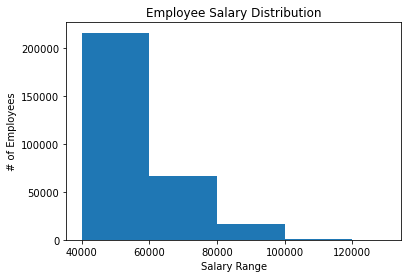

In [22]:
plt.hist(
    df['salary'],
    bins = [40000, 59999.99, 79999.99, 99999.99, 119999.99, 130000]
)

plt.title("Employee Salary Distribution")
plt.xlabel('Salary Range')
plt.ylabel('# of Employees')
plt.show()

## 3) Create a bar chart of average salary by title.

In [29]:
avg_sal_by_ttl = df[['title', 'salary']].groupby('title').mean()
avg_sal_by_ttl.reset_index(inplace=True)
avg_sal_by_ttl

,title,salary
0,Assistant Engineer,48564.434447
1,Engineer,48535.336511
2,Manager,51531.041667
3,Senior Engineer,48506.799871
4,Senior Staff,58550.172704
5,Staff,58465.382850
6,Technique Leader,48582.896092


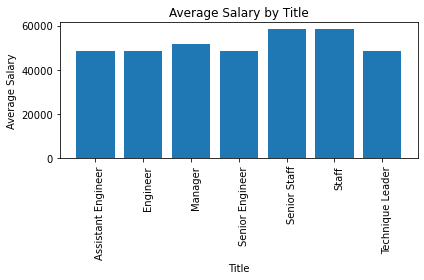

In [50]:
plt.bar(
    x = avg_sal_by_ttl['title'],
    height = avg_sal_by_ttl['salary']
)

plt.title("Average Salary by Title")
plt.xlabel('Title')
plt.ylabel('Average Salary')
plt.xticks(rotation = 90, ha = 'right', wrap = True)
plt.tight_layout()
plt.show()